[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI342-F1/Lab-Tutoral/blob/main/AI342Lab1.ipynb)

# Lab 1: Introduction to Digital Images and Image Processing with Python
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS
---
### Learning Objectives:
* Represent a digital image as a numerical array.
* Understand pixels, spatial resolution, and grey level intensity.
* Load, display, and inspect images in Python.
* Apply simple low-level image processing operations.
* Relate practical operations to the image processing pipeline introduced in Chapter 1

## 1. Environment Setup

In [1]:
# write your code here

import numpy as np
import matplotlib.pyplot as plt
import cv2

## 2. What is a digital image in practice?
In the lecture, a digital image is defined as a two dimensional function $f(x,y)$ where the value at each coordinate represents intensity. In practice, this function is stored as a matrix of numbers.

##**Exercise 2.1: Create a synthetic image**


In [2]:
# Task: Create an 8x8 black image (matrix of zeros)
# Hint: Use np.zeros((rows, cols))
row = 8
col = 8
black_image = np.zeros((row, col))

# print the image 
print(black_image)

# --- Discussion Questions ---
# 1. What is the spatial resolution of this image?
'''
Spatial resolution is the number of samples taken to 
digitalize or create an image, in this example we created
a matrix of 8 by 8 grid like -spatial coordinates- so the 
spatial resolution = the number of pixels in the matrix = 8*8 = 64 
'''
# 2. What does each value represent?
'''
The spatial coordinates are the rows and columns that make up the image
each value within each coordinate will store bits -> indicating the result of the function 
AKA the intensity of grey scale of the amplitude/pixel
'''

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


'\nThe spatial coordinates are the rows and columns that make up the image\neach value within each coordinate will store bits -> indicating the result of the function \nAKA the intensity of grey scale of the amplitude/pixel\n'

## **Exercise 2.2: Visualise the image**

<function matplotlib.pyplot.show(close=None, block=None)>

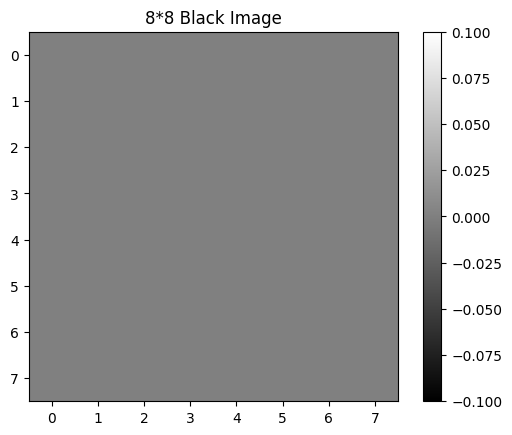

In [3]:
# write your code here

# using matplot 
plt.imshow(black_image, cmap='grey')
plt.title('8*8 Black Image')
plt.colorbar()
plt.show

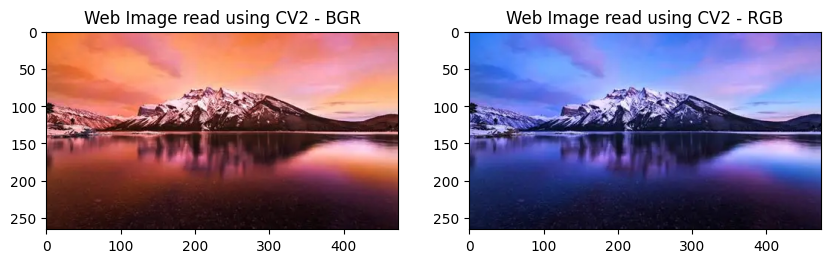

In [4]:
# additional - try using it with cv2!

img = cv2.imread('./OIP.webp')

# display
# cv2.imshow("Web Image", img) # -> cannot use this code because the working env is a notebook no GUI windows allowed

# display using matplot instead

# first inverst BGR to RGB
img_invert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.imshow(img)
plt.title("Web Image read using CV2 - BGR")

plt.subplot(1,2,2)
plt.imshow(img_invert)
plt.title("Web Image read using CV2 - RGB")
plt.show()

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


<function matplotlib.pyplot.show(close=None, block=None)>

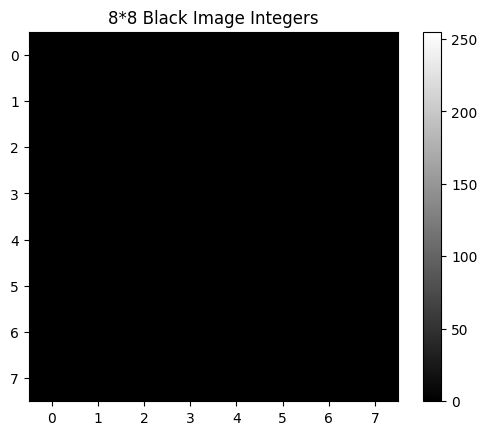

In [5]:
# why the image is not totally black that is clearly grey!

# turn the values into integers
black_image_int = np.zeros((row, col), dtype=int)

# display the matrix
print(black_image_int)

# display it using plt
# this is the fix it is not about the integers
plt.imshow(black_image_int, cmap='grey', vmin=0, vmax=255)
plt.title('8*8 Black Image Integers')
plt.colorbar()
plt.show

# before we were setting the default values of grey level intensity which is 0.1 to -0.1

## 3. Pixels and intensity values
Pixels are the smallest units of a digital image and hold quantised intensity values, as discussed in the slides on pixels and digitisation
## **Exercise 3.1: Modify individual pixels**


[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 255.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 128.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


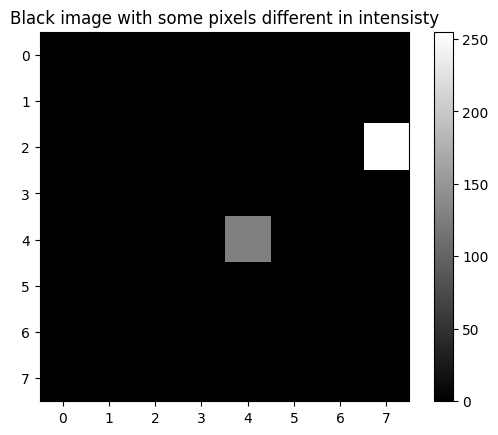

'\nQuantisation tries to convert continues analouge \nsignals to digital representation, which means when i take \nan image with a sensor that is sensitive to iluminations that \nsends different analouge signals according to different levels \nof ilumination which then affect the visuals -they appear \ndifferent even digitally as the do in real life-\n'

In [6]:
# write your code here

# Task: Change some pixels to 255 (White) and re-visualize
# image[row, col] = 255
# WRITE YOUR CODE HERE:
black_image[4,4] = 128 #hehe i like this
black_image[[2],[7]] = 255
print(black_image)

plt.imshow(black_image, cmap='grey')
plt.title("Black image with some pixels different in intensisty")
plt.colorbar()
plt.show()

#Questions
#1.	Which pixel is brighter and why?
'''
The pixel that is closer to the maximum level of intensity as 
the levels starts from 0 to 255 as I identified with 0 -> black
255 -> white
'''
#2.	How does quantisation affect visual appearance?
'''
Quantisation tries to convert continues analouge 
signals to digital representation, which means when i take 
an image with a sensor that is sensitive to iluminations that 
sends different analouge signals according to different levels 
of ilumination which then affect the visuals -they appear 
different even digitally as the do in real life-
'''

## 4. Grey scale images
The course focuses primarily on grey scale images with one sample per pixel.
## **Exercise 4.1: Generate a gradient image**


[[  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 ...
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]]


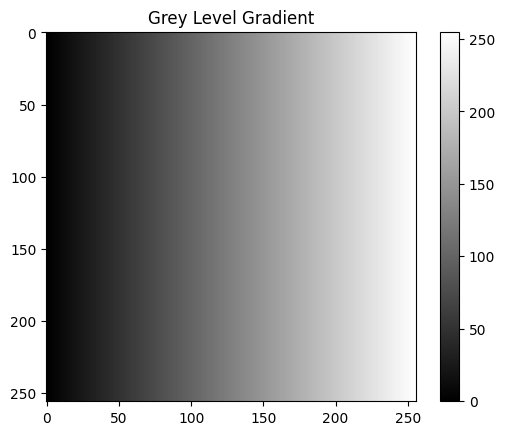

[[255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]
 ...
 [255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]]


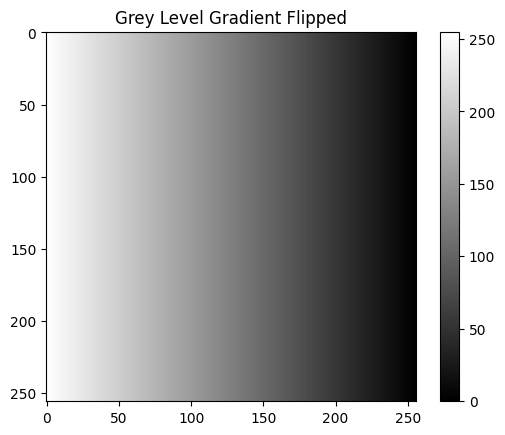

'\n# uint8 -> unsigned 8-bit integer\na data type that can store whole numbers of 0 - 255\nunsigned -> no negative vallues allowed\n8-bit -> uses exactly 8 bits to store each number as 2^8 = 256\ninteger -> whole numbers only no floating point numbers\n'

In [7]:
# write your code here

gradient = np.tile(np.linspace(0, 255, 256), (256, 1))

print(gradient)

# 256 value stored in a linear array
# keep stacking 256 row on top of each other just like that 
# and only one time at columns

plt.imshow(gradient, cmap='grey', vmin=0, vmax=255)
plt.title('Grey Level Gradient')
plt.colorbar()
plt.show()

# you can flip it like so
gradient_flipped = np.tile(np.linspace(255, 0, 256), (256, 1))

print(gradient_flipped)

plt.imshow(gradient_flipped, cmap='grey', vmin=0, vmax=255)
plt.title('Grey Level Gradient Flipped')
plt.colorbar()
plt.show()

#Questions
#1.	How many grey levels are visible?
'''
256 different level
'''
#2.	What data type is used to store the pixel values? 
'''
# uint8 -> unsigned 8-bit integer
a data type that can store whole numbers of 0 - 255
unsigned -> no negative vallues allowed
8-bit -> uses exactly 8 bits to store each number as 2^8 = 256
integer -> whole numbers only no floating point numbers
'''

## 5. Image acquisition and representation
Image acquisition converts a physical scene into a digital image. In Python, loading an image is equivalent to acquiring an already digitised scene.
## **Exercise 5.1: Load and inspect an image**

(266, 474, 3)
uint8
[[[ 39 121 237]
  [ 39 121 237]
  [ 39 121 237]
  ...
  [113 120 229]
  [115 123 230]
  [116 124 231]]

 [[ 39 121 237]
  [ 39 121 237]
  [ 39 121 237]
  ...
  [112 119 228]
  [113 121 227]
  [113 121 227]]

 [[ 39 121 237]
  [ 39 121 237]
  [ 39 121 237]
  ...
  [111 118 227]
  [109 117 224]
  [109 117 224]]

 ...

 [[ 20  27  56]
  [  7  14  43]
  [  9  16  46]
  ...
  [ 23  14  31]
  [ 23  14  31]
  [ 21  12  28]]

 [[ 41  47  77]
  [  5  11  41]
  [  9  16  46]
  ...
  [ 23  14  31]
  [ 25  15  32]
  [ 66  57  74]]

 [[ 53  59  89]
  [  5  11  41]
  [ 11  17  47]
  ...
  [ 23  14  31]
  [ 26  16  33]
  [ 66  57  74]]]


<function matplotlib.pyplot.show(close=None, block=None)>

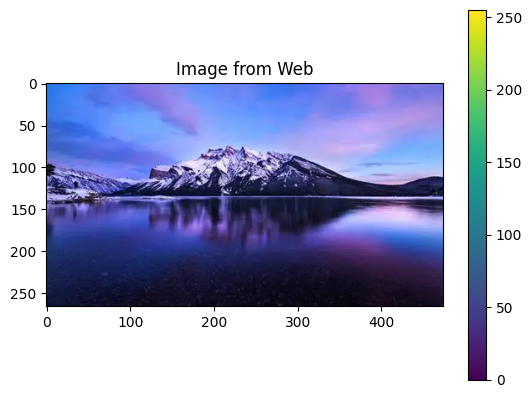

In [8]:
# write your code here

path = './OIP.webp'
# import required library to read images from paths of stored on device images

from matplotlib.image import imread


webimage = imread(path)

print(webimage.shape)
# (266, 474, 3) - 3 for three channels RGB and the others are rows and cols of spatial coordinates

print(webimage.dtype)
# uint8 - that's that type used to store pixel intensities 
# as unsigned 8-bit integers for each value in the matrix AKA 
# image and that's why the images above I created had float64 
# as their type as I created them using numpy.zeros() function 
# which has dtype=float64 by default

print(webimage)

# display
plt.imshow(webimage)
plt.title('Image from Web')
plt.colorbar()
plt.show

[[132.33333333 132.33333333 132.33333333 ... 154.         156.
  157.        ]
 [132.33333333 132.33333333 132.33333333 ... 153.         153.66666667
  153.66666667]
 [132.33333333 132.33333333 132.33333333 ... 152.         150.
  150.        ]
 ...
 [ 34.33333333  21.33333333  23.66666667 ...  22.66666667  22.66666667
   20.33333333]
 [ 55.          19.          23.66666667 ...  22.66666667  24.
   65.66666667]
 [ 67.          19.          25.         ...  22.66666667  25.
   65.66666667]]
(266, 474)
float64


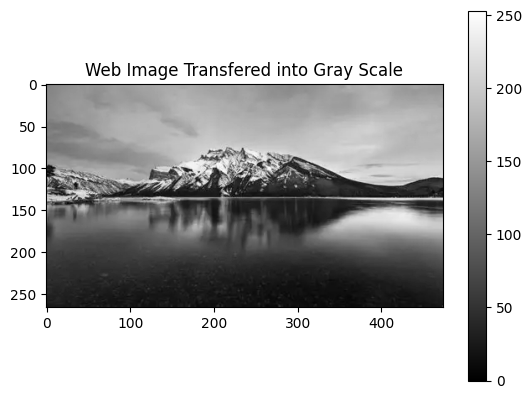

In [9]:
# Task 
# Convert the image to grey scale by averaging the colour channels. 

# webimage is just an array/matrix
webimage_grey = webimage

# I take the avg of the RGB of each channel value in the pixel itself 
webimage_grey = webimage_grey.mean(axis=2) 
# prev. I used 1 and it appeard slim?

# so the image is 3d it has height axis 0, width axis 1, and pixel(intensity level) 2
# that is why the axis=2 !!


print(webimage_grey)

print(webimage_grey.shape)
# (266, 474) -> now the last axis/dim is the gray level so it is only 
# one dimension a bit only carrying the intensity not channels

print(webimage_grey.dtype)
# numpy.mean is used and ofcourse it returns float64 by default

plt.imshow(webimage_grey, cmap='gray')
plt.title("Web Image Transfered into Gray Scale")
plt.colorbar()
plt.show()

Data type after changing it to uint8:  uint8
[[133 133 133 ... 155 157 158]
 [133 133 133 ... 154 154 154]
 [133 133 133 ... 153 151 151]
 ...
 [ 34  21  23 ...  22  22  20]
 [ 55  19  23 ...  22  24  66]
 [ 67  19  25 ...  22  25  66]]


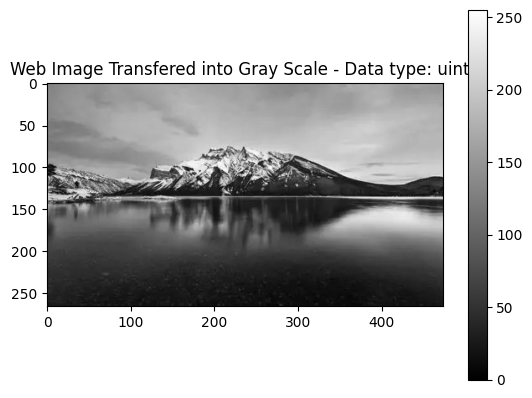

In [10]:
# additional - change the data type to be uint8

# this line from stackoverflow                           
# webimage_grey = cv2.normalize(webimage_grey, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
'''
explination
cv2.normalize(source array, destination array -if none, then create 
new array and store the new values-, alpha -new minimum value-, beta -new 
maximum value-, norm_type -how to strech the image to meet the new 
min/max values-, dtype -the new transfered data type-)
'''

# these two lines looks scary ;<
# webimage_grey *= 255
# webimage_grey = webimage_grey.astype(np.uint8)
'''because the webimage_gray is not [0,1] normalized and I am not 
sure what is its min/max values especially after calculating image.mean()
as scaling to uint8 will surly round values into 0-255 that will 
make float numbers lose information for sure'''


# this function works just like cv2.normalize!
def normalize8(image):
  '''min max normalization using numpy'''
  min_value = image.min()
  max_value = image.max()

  # compute range and reuse the range in the max_value instead of the real max value
  max_value -= min_value

  image = ((image - min_value)/max_value) * 255 #division maps to [0,1] and then *255 maps to [0,255]
  return image.astype(np.uint8)

webimage_grey = normalize8(webimage_grey)

print("Data type after changing it to uint8: ", webimage_grey.dtype)

# now print the image using matplot
print(webimage_grey)

plt.imshow(webimage_grey, cmap='gray')
plt.title("Web Image Transfered into Gray Scale - Data type: uint8")
plt.colorbar()
plt.show()


## 6. Low level image processing: image in, image out
Low level processing improves visual quality without extracting semantic meaning, as described in the lecture pipeline
## **Exercise 6.1: Image enhancement by contrast stretching**

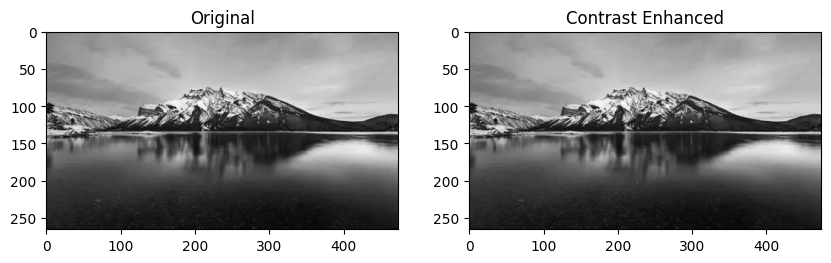

min/max values before enhancements
0 255
min/max values after enhancements
0 255


"\nSubjective. It does enhance images but its degree of improvement \nis evaluated to the human eye, and it doesn't require usage of mathematical \nformuals/algorithms for enhancement\n"

In [11]:
# write your code here

# in contrast, you define the min intensity value and the max intensity value
# and try to stretch them

min_Val = webimage_grey.min()
max_val = webimage_grey.max()

# same normalization above
enhanced = (webimage_grey - min_Val) / (max_val - min_Val) * 255 

plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.imshow(webimage_grey, cmap='gray') 
plt.title("Original") 
 
plt.subplot(1,2,2) 
plt.imshow(enhanced, cmap='gray') 
 
plt.title("Contrast Enhanced") 
plt.show()

print("min/max values before enhancements")
print(min_Val, max_val)

print("min/max values after enhancements")
print(webimage_grey.min(), webimage_grey.max())

#Questions
#1.	Which image has better visibility of details?
'''
Not quite different from human prespective but surly the enhanced 
version is better in contrast
'''
#2.	Is this enhancement subjective or objective?
'''
Subjective. It does enhance images but its degree of improvement 
is evaluated to the human eye, and it doesn't require usage of mathematical 
formuals/algorithms for enhancement
'''

## 7. Noise and image restoration
Noise removal is a core example of low level processing.

## **Exercise 7.1: Add artificial noise**

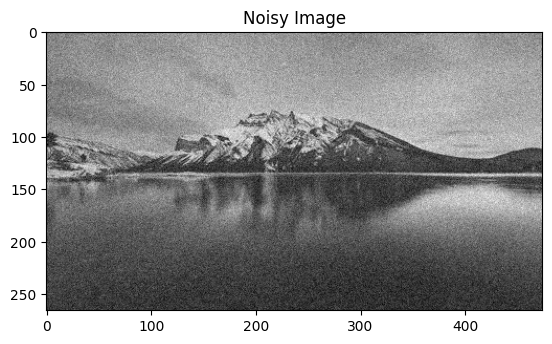

In [12]:
# write your code here

# this is the normal distribution functions with mean of 0 and std of 20
noise = np.random.normal(0, 20, webimage_grey.shape) 
# larger std the noisier it gets 

noisy = webimage_grey + noise # new array with noise

plt.imshow(noisy, cmap='gray')  
plt.title("Noisy Image") 
plt.show() 

## **Exercise 7.2: Simple smoothing filter**

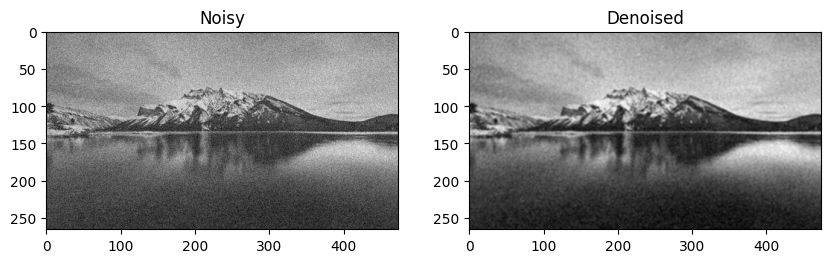

In [13]:
def mean_filter(img, k=3): # try k=3, k=5, k=9
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

# complete the code here

# use the function

# how about running it two times?
for i in range(10): 
    denoised = mean_filter(noisy)

plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.imshow(noisy, cmap='gray') 
plt.title("Noisy") 
 
plt.subplot(1,2,2) 
plt.imshow(denoised, cmap='gray') 
plt.title("Denoised") 
plt.show() 

noisy image data type:  float64
noisy image data type:  uint8
noisy image shape:  (266, 474)


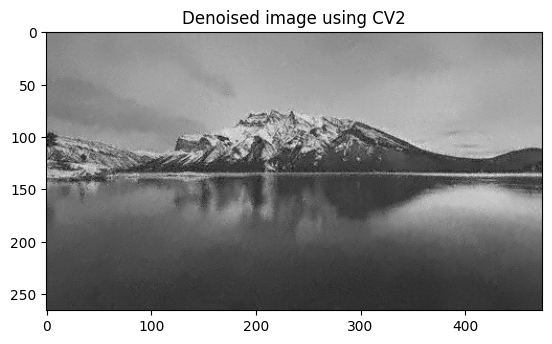

In [ ]:
# additional 

# convert inage type to uint8
print("noisy image data type: ", noisy.dtype)
noisy = cv2.normalize(noisy, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

print("noisy image data type: ", noisy.dtype)
print("noisy image shape: ", noisy.shape)

# let's try denoising from CV2!
denoise = cv2.fastNlMeansDenoising(noisy, None, 10, 7, 21)

'''Non Local means desoine algorithm! it works by changing
the pixel color based on the similar AKA look alike pixels!
and guess what! they do not have to be neighbors or next to
each other to affect the pixels intensity value, it only has
to be similar to it, so it searches through pixels in the image
looking for pretty similar pixels and avg them to create new value
which is the denoising of this particular pixel.
It assumes that the noise created is Gaussian noise.'''

# display denoised image 
plt.imshow(denoise, cmap='gray')
plt.title("Denoised image using CV2")
plt.show()

# wooowwww!!! this is actually so better and way cooler! gosh I love math!

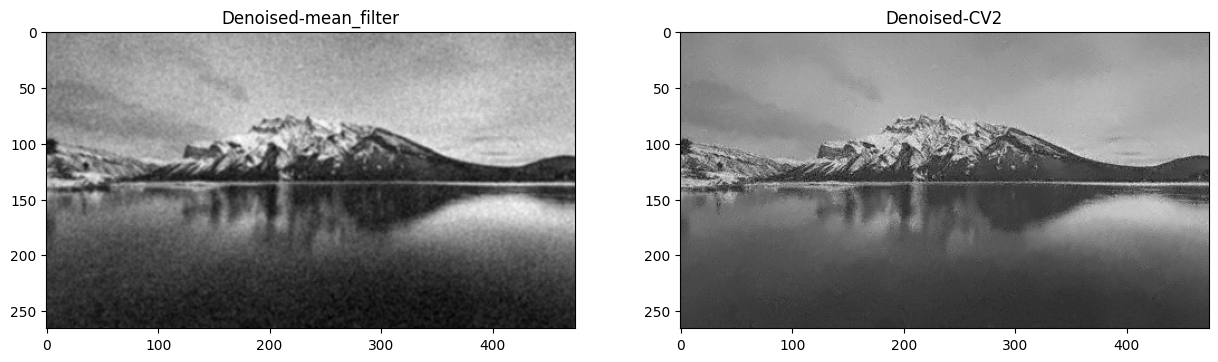

In [15]:
# additional 

# display both denoised images next to each other 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised-mean_filter")

plt.subplot(1,2,2)
plt.imshow(denoise, cmap='gray')
plt.title("Denoised-CV2")

plt.show()

## 8. From image processing to image analysis
The lecture distinguishes between low, mid, and high level processing.
## **Exercise 8.1: Simple threshold segmentation**

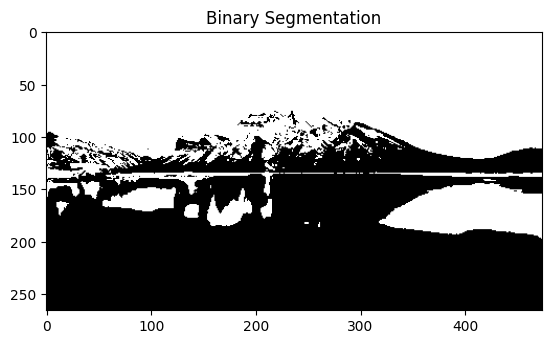

'since this threshold only seperate pixels that are below and over the mean\ninto black and white levels only, so many details can be lost if the image\nhas complicated shapes like the one I used from the web, the sky and the top\nof the mountain were merged together, parts of the lake where the reflection\nis displayed the most turned completly white'

In [16]:
## write your code here

threshold = webimage_grey.mean()
binary = webimage_grey > threshold

plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.show()

# Discussion:
# 1. Is this segmentation reliable?
'''It can be effective enough when using an image with simple objects in it,
although it is better to use a more complicated threshold that is able to detect
objects effectivly'''
# 2. What information is lost when converting to binary?
'''since this threshold only seperate pixels that are below and over the mean
into black and white levels only, so many details can be lost if the image
has complicated shapes like the one I used from the web, the sky and the top
of the mountain were merged together, parts of the lake where the reflection
is displayed the most turned completly white'''

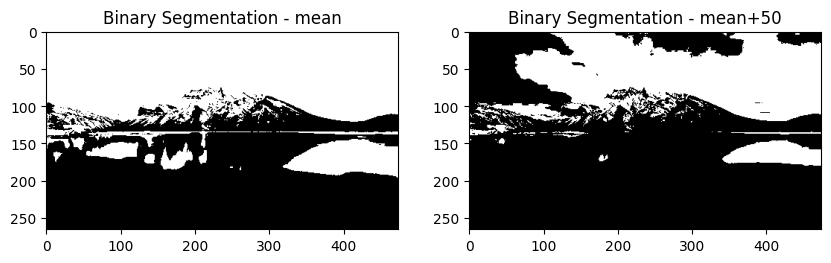

In [17]:
# additional 

# changing the threshold effect the boundries of objects in the image 
threshold_50 = webimage_grey.mean()+50
binary = webimage_grey > threshold
binary_50 = webimage_grey > threshold_50

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation - mean")

plt.subplot(1,2,2)
plt.imshow(binary_50, cmap='gray')
plt.title("Binary Segmentation - mean+50")
plt.show()

# **9. Mini project: connecting theory to practice**

**Task**

Using only NumPy and Matplotlib:

1.	Create a synthetic image containing at least two objects

2.	Add noise to the image

3.	Apply enhancement and denoising

4.	Segment the objects using a threshold

**Deliverables**

•	Code

•	Output images

•	Short explanation mapping each step to the image processing stages shown in the Chapter 1 pipeline diagram


***Note: Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots***

## **Task 1**
#### Create a synthetic image containing at least two objects


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


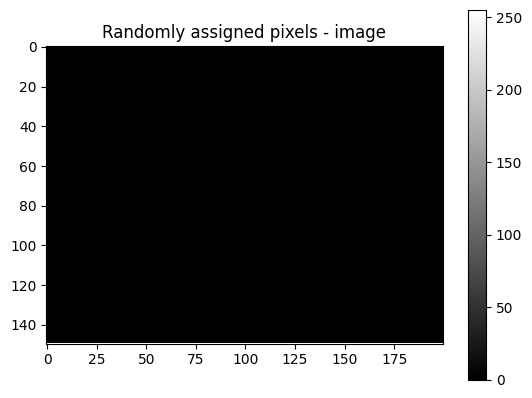

In [ ]:
# a synthetic image is an image that you generate by code and not captured by a camera 

# specify rows and columns
row = 150
col = 200

# create a black image
image = np.zeros((row,col))

# print and display image
print(image)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Randomly assigned pixels - image")
plt.colorbar()
plt.show()

## **Task 2**
#### Add noise to the image

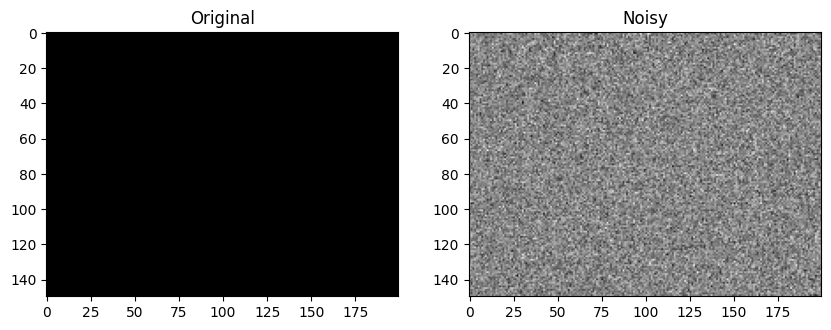

In [30]:
# create Gaussian noise with mean=0 and std=25
noise = np.random.normal(0, 25, image.shape)

# add noise to image
noisy_image = image + noise

# display both images 

plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.imshow(image, cmap='gray') 
plt.title("Original") 
 
plt.subplot(1,2,2) 
plt.imshow(noisy_image, cmap='gray') 
plt.title("Noisy") 
plt.show()

## **Task 3**
#### Apply enhancement and denoising

In [ ]:
# enhancement

# denoising

## **Task 4**
#### Segment the objects using a threshold

In [ ]:
# segment 

# **10. Reflection questions**

1. Where does image processing end and image analysis begin in your mini project? 
2. Which steps correspond to low level processing only? 
3. Why is digitisation always an approximation of reality? 